# IDH em São Paulo (2010)

importando as bibliotecas

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
from pypalettes import load_cmap
from highlight_text import fig_text, ax_text
from pyfonts import load_font

Dataset

In [3]:
path = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/saopaulo.geojson"
df = gpd.read_file(path)
df.head()

,code_udh,HDI,pop,geometry
0,1355030801001,0.866,20388.0,"POLYGON ((-46.53789 -23.56245, -46.53799 -23.5..."
1,1355030801002,0.870,21937.0,"POLYGON ((-46.54193 -23.54086, -46.54212 -23.5..."
2,1355030801003,0.790,10536.0,"POLYGON ((-46.51514 -23.55757, -46.51534 -23.5..."
3,1355030801004,0.816,27925.0,"POLYGON ((-46.5326 -23.5737, -46.53276 -23.574..."
4,1355030801005,0.820,6817.0,"POLYGON ((-46.50676 -23.57095, -46.50697 -23.5..."


In [14]:
atlas = df[['HDI','pop']].copy()

bins= [0.0,0.65,0.699,0.749,0.799,0.849,0.899,0.949,1.0]
labels = [
    "0.650 ou menos",
    "0.650 a 0.699",
    "0.700 a 0.749",
    "0.750 a 0.799",
    "0.800 a 0.849",
    "0.850 a 0.899",
    "0.900 a 0.949",
    "0.950 ou mais"
]

atlas['group_hdi'] = pd.cut(atlas['HDI'], bins=bins, include_lowest=True, labels=labels)

pop_idh = atlas.groupby('group_hdi',observed=True)['pop'].sum().reset_index()
pop_idh['share'] = (pop_idh['pop'] / pop_idh['pop'].sum()) * 100

pop_idh['y_text'] = pop_idh['share'] / 2
pop_idh['label'] = pop_idh['share'].round(1).astype(str) + '%'

pop_idh

,group_hdi,pop,share,y_text,label
0,0.650 ou menos,415953.0,3.710661,1.855331,3.7%
1,0.650 a 0.699,1620623.0,14.457362,7.228681,14.5%
2,0.700 a 0.749,2106520.0,18.791984,9.395992,18.8%
3,0.750 a 0.799,2460948.0,21.953789,10.976895,22.0%
4,0.800 a 0.849,1576054.0,14.059768,7.029884,14.1%
5,0.850 a 0.899,1417249.0,12.643090,6.321545,12.6%
6,0.900 a 0.949,1409668.0,12.575460,6.287730,12.6%
7,0.950 ou mais,202658.0,1.807885,0.903943,1.8%


Choropleth Map

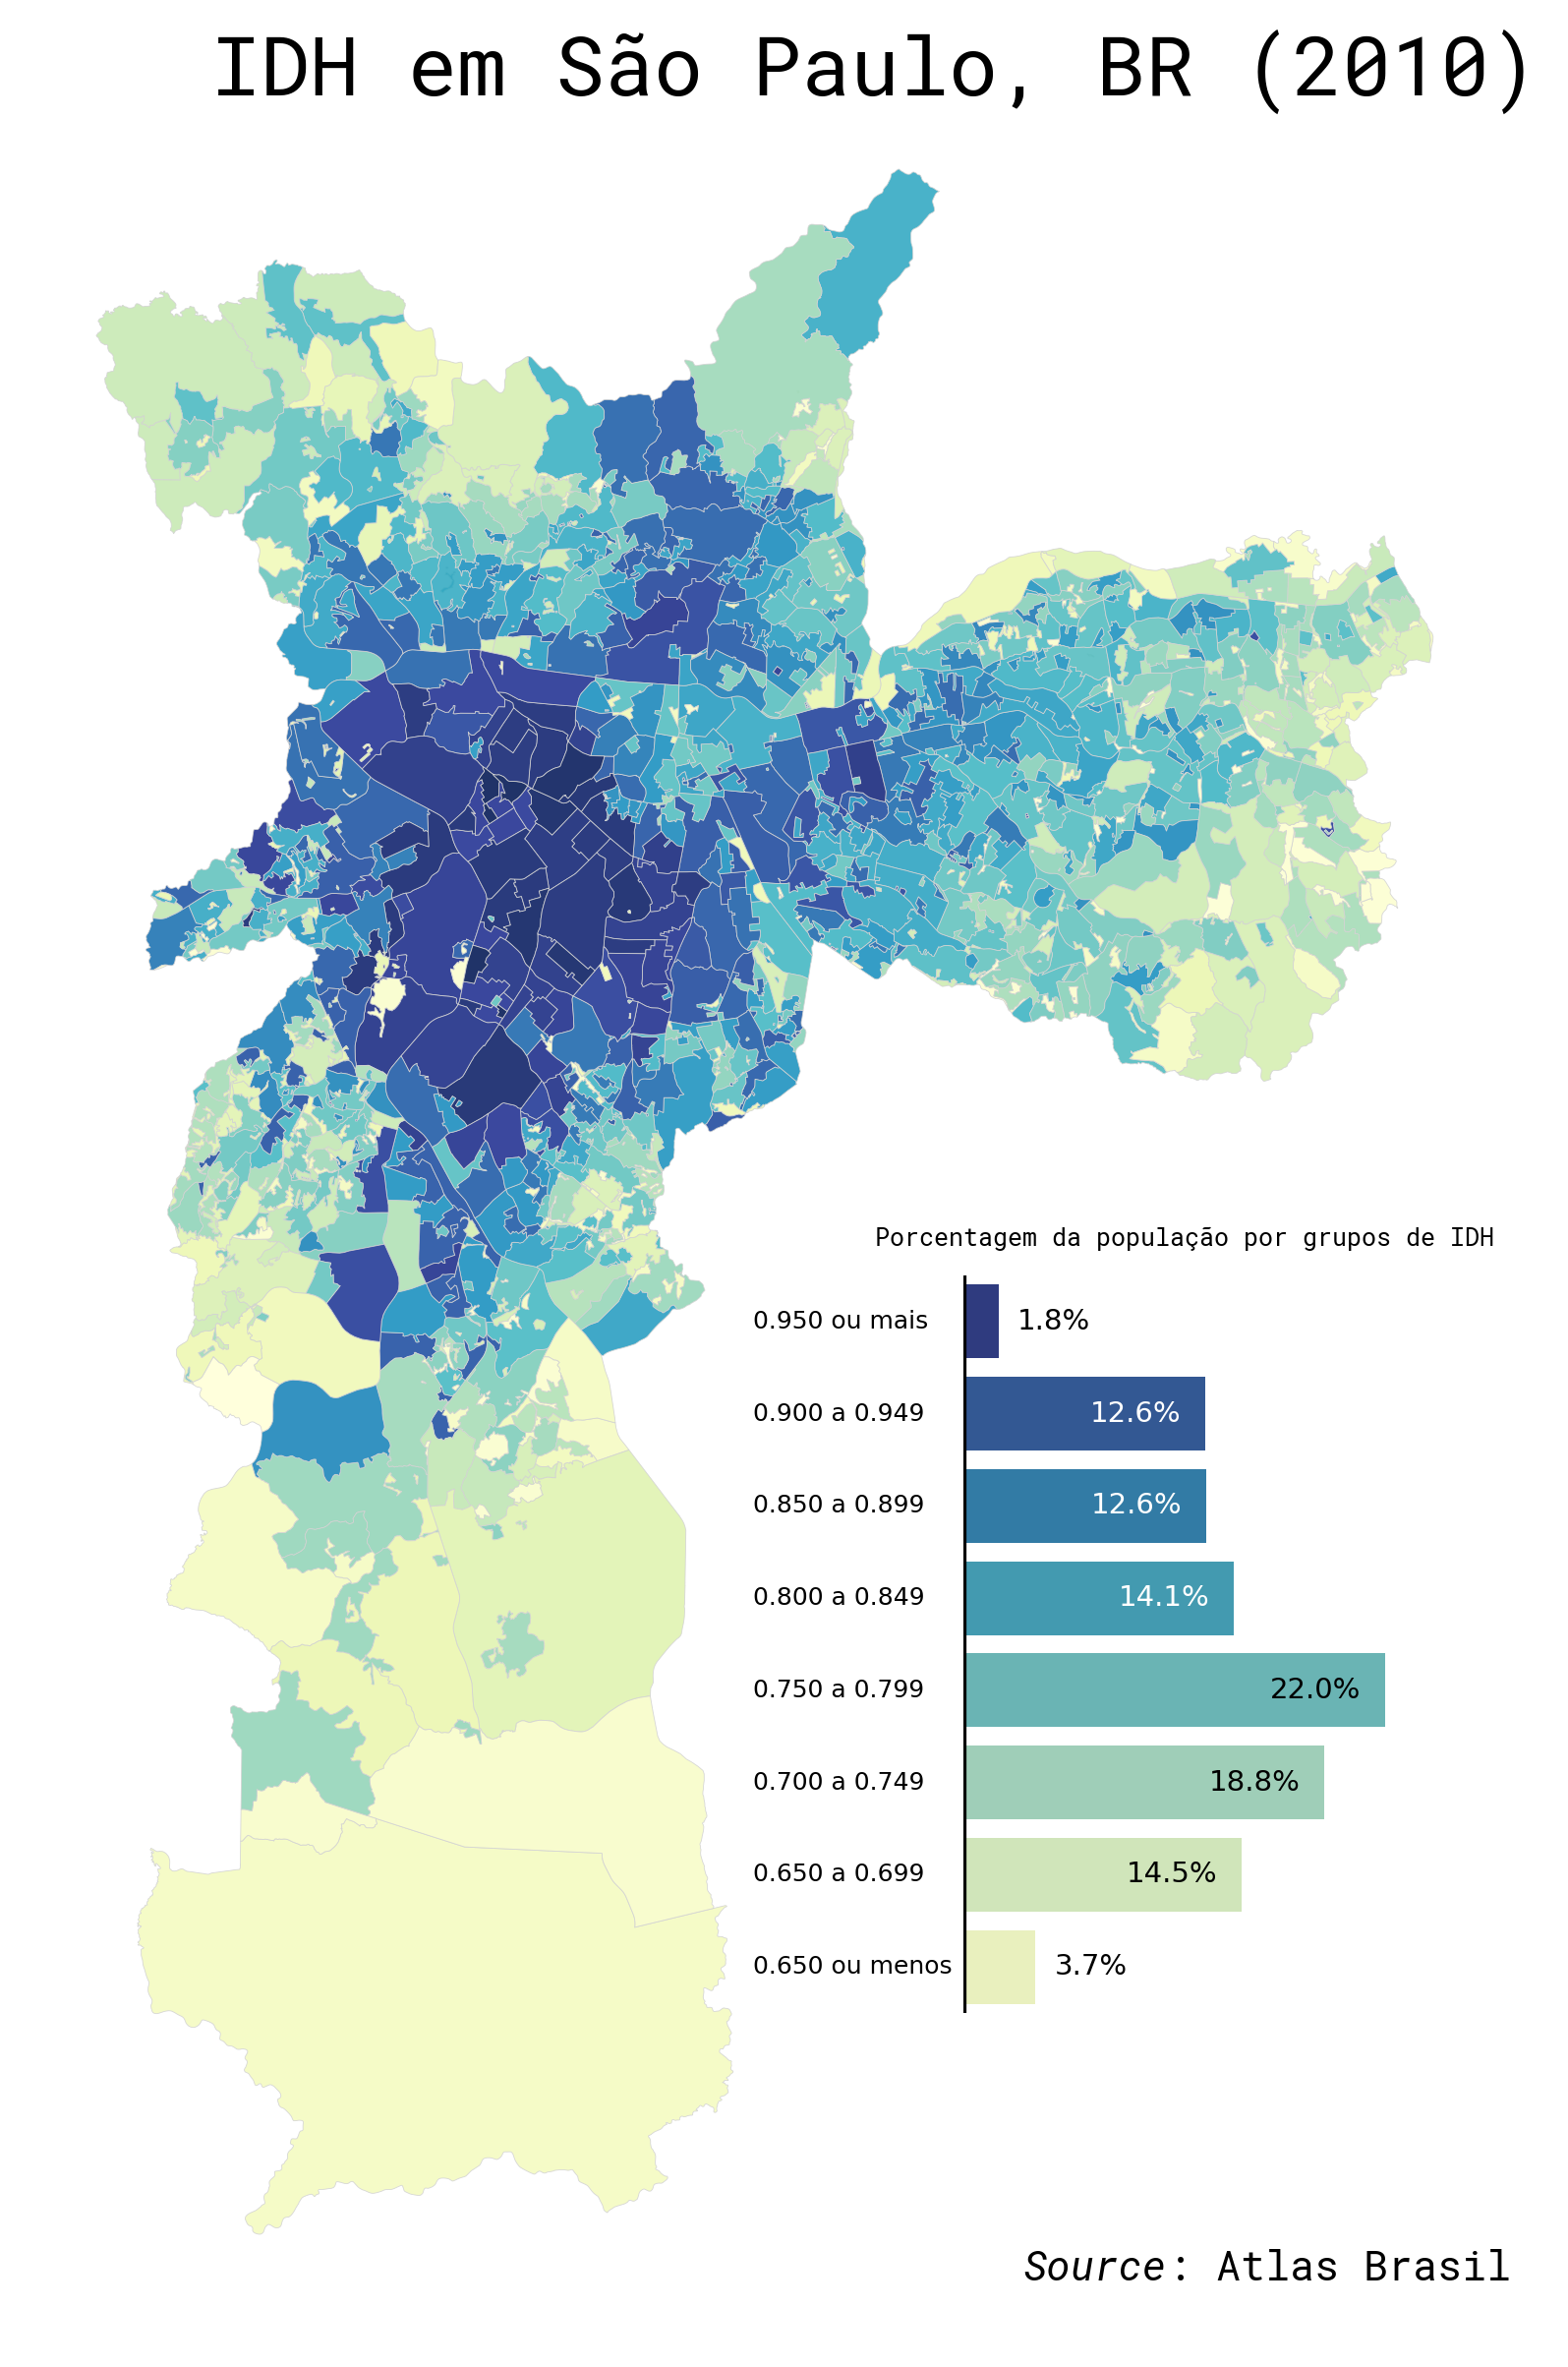

In [17]:
font = load_font(font_url="https://github.com/google/fonts/blob/main/apache/robotomono/RobotoMono%5Bwght%5D.ttf?raw=true")
boldfont = load_font(font_url="https://github.com/google/fonts/blob/main/apache/robotomono/RobotoMono-Italic%5Bwght%5D.ttf?raw=true")

palette_name = 'YlGnBu'
cmap = load_cmap(palette_name, cmap_type='continuous')

# Choropleth
fig, ax = plt.subplots(figsize=(10,10), dpi=300)
ax.axis('off')
df.plot(ax=ax, column = 'HDI', cmap=cmap, edgecolor='lightgrey',linewidth=0.2, alpha=0.9)

# barplot
mini_ax = ax.inset_axes(bounds=(0.58,0.22,0.15,0.25), transform=fig.transFigure)
mini_ax.set_axis_off()
sns.barplot(
    data=pop_idh,
    x='share',
    y='group_hdi',
    palette=palette_name,
    ax=mini_ax,
    hue='group_hdi',
    legend=False
)
mini_ax.axvline(x=0,color='black')
mini_ax.invert_yaxis()

for index, row in pop_idh.iterrows():
    x_pos = row['share'] - 6 if row['share'] > 4 else row['share'] + 1
    y_pos = index
    color = 'white' if index in [4,5,6] else 'black'
    mini_ax.text(x_pos, y_pos, row['label'], color=color, size=7, va='center')
    mini_ax.text(-11, y_pos, row['group_hdi'], color='black', size=6, va='center')

fig.text(x=0.55, y=0.87, s="IDH em São Paulo, BR (2010)",ha='center', size=20, font=font)
fig.text(x=0.55,y=0.48, s='Porcentagem da população por grupos de IDH', size=6, font=font)
fig_text(x=0.6,y=0.14,s='<Source>: Atlas Brasil', size=10, font=font, highlight_textprops=[{'font':boldfont}])

plt.savefig(
    "./IDH_SP"
)

plt.show()